In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
# top 40 dax companies 
dax_assets = {
               'DAX': '^GDAXI',
               'Linde': 'LIN',
               'SAP': 'SAP',
               'Deutsche Telekom': 'DTE.DE',
               'Volkswagen': 'VOW3.DE',
               'Siemens': 'SIE.DE',
               'Merck': 'MRK.DE',
               'Airbus': 'AIR.PA',
               'Mercedes Benz': 'MBG.DE', 
               'Bayer': 'BAYZF',
               'BMW': 'BMW.DE',
               'Siemens Healthineers': 'SHL.DE',
               'Deutsche Post': 'DPW.DE',
               'BASF': 'BAS.DE',
               'Münchner Rück': 'MUV2.DE',
               'Infineon': 'IFX.DE',
               'Deutsche Börse': 'DB1:DE',
               'RWE': 'RWE.DE',
               'Henkel': 'HEN3.DE',
               'Adidas': 'ADS.DE',
               'Sartorius': 'SRT.DE',
               'Beiersdorf': 'BEI.DE',
               'Porsche': 'PAH3.DE',
               'E.ON': 'EOAN.DE',
               'Deutsche Bank': 'DB',
               'Vonovia': 'VNA.DE',
               'Fresenius': 'FRE.DE',
               'Symrise': 'SY1.DE',
               'Continental': 'CON.DE',
               'Delivery Hero': 'DHER.F',
               'Brenntag': 'BNR.DE',
               'Qiagen': 'QGEN',
               'Fresenius Medical Care': 'FMS',
               'Siemens Energy': 'ENR.F',
               'HeidelbergCement': 'HEI.DE',
               'Puma': 'PUM.DE',
               'MTU Aero Engines': 'MTX.DE',
               'Covestro': '1COV.F',
               'Zalando': 'ZAL.DE',
               'HelloFresh': 'HFG.DE'
            }

In [3]:
# utils
def find_stock_name(stock_ticker:str)->str:
    """return stock or asset name given the stock/asset ticker name"""
    for key, val in dax_assets.items():
        if val == stock_ticker:
            return key

In [4]:
dax_top_40_companies = list(dax_assets.keys())#[1:]
dax_top_40_tickername = list(dax_assets.values())#[1:]

In [5]:
start_date = datetime(2019,1,1)
str(start_date.year)+'-'+str(start_date.month)+'-'+str(start_date.day)

'2019-1-1'

In [6]:
start_date = '2010-1-1'
end_date = '2022-9-15'
na_percentage = 0.6 # at least x percent rows must be none-nas

In [7]:
# download DAX top40
df = yf.download(dax_top_40_tickername, 
                start=start_date, 
                end=end_date,
                progress=True)
# drop columns
df = df['Close']
# get actual stock names
stock_names = [find_stock_name(stock_ticker) for stock_ticker in df.columns]
# rename columns
df.columns = stock_names
# make sure the index is datetime format
df.index = pd.to_datetime(df.index)
# drop nas
datetimeFormat = '%Y-%m-%d'
time_delta = datetime.strptime(end_date, datetimeFormat) - datetime.strptime(start_date,datetimeFormat)
df.dropna(axis=1, thresh=int(time_delta.days * na_percentage), inplace=True)
# show data
df.head()

[*********************100%***********************]  40 of 40 completed

1 Failed download:
- DB1:DE: No data found, symbol may be delisted


,Adidas,Airbus,BASF,Bayer,Beiersdorf,BMW,Brenntag,Continental,Deutsche Bank,Deutsche Post,...,Porsche,Puma,Qiagen,RWE,SAP,Siemens,Sartorius,Symrise,Volkswagen,DAX
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,80.400002,NaN,NaN,NaN,NaN,67.662216,NaN,...,NaN,NaN,23.212057,NaN,46.810001,NaN,NaN,NaN,NaN,NaN
2010-01-04,38.505001,13.990,44.849998,80.400002,46.445000,32.049999,NaN,36.867805,69.875954,13.980,...,37.068539,24.090000,23.555094,68.731125,47.110001,63.442383,3.8500,15.515,64.114349,6048.299805
2010-01-05,39.720001,13.945,44.169998,80.400002,46.200001,32.310001,NaN,39.174160,71.211830,14.000,...,38.269535,24.010000,23.264032,68.292587,46.820000,63.481140,3.9675,15.520,62.871826,6031.859863
2010-01-06,39.400002,14.070,44.450001,78.949997,46.165001,32.810001,NaN,39.430424,69.980919,14.155,...,39.021763,23.625000,23.513514,68.163017,47.910000,63.713711,3.9675,16.020,64.611359,6034.330078
2010-01-07,39.744999,14.210,44.154999,78.949997,45.700001,33.099998,NaN,44.483124,70.772903,14.125,...,41.274170,23.504999,23.617464,67.873978,49.169998,64.469551,3.9550,15.910,65.356880,6019.359863


In [8]:
# check if any NAs 
df.isna().sum()

Adidas                     60
Airbus                     34
BASF                       60
Bayer                      88
Beiersdorf                 60
BMW                        60
Brenntag                  120
Continental                60
Deutsche Bank              88
Deutsche Post              60
Deutsche Telekom           60
E.ON                       60
Fresenius Medical Care     88
Fresenius                  60
HeidelbergCement           60
Henkel                     60
Infineon                   60
Linde                      88
Mercedes Benz              60
Merck                      60
MTU Aero Engines           60
Münchner Rück              60
Porsche                    60
Puma                       60
Qiagen                     88
RWE                        60
SAP                        88
Siemens                    60
Sartorius                  60
Symrise                    60
Volkswagen                 60
DAX                        65
dtype: int64

In [9]:
df = df.interpolate(method='time', limit=7).fillna(value=None, method='bfill', axis=0, inplace=False, limit=7, downcast=None)

In [10]:
# check if any NAs left
df.isna().sum()

Adidas                     0
Airbus                     0
BASF                       0
Bayer                      0
Beiersdorf                 0
BMW                        0
Brenntag                  55
Continental                0
Deutsche Bank              0
Deutsche Post              0
Deutsche Telekom           0
E.ON                       0
Fresenius Medical Care     0
Fresenius                  0
HeidelbergCement           0
Henkel                     0
Infineon                   0
Linde                      0
Mercedes Benz              0
Merck                      0
MTU Aero Engines           0
Münchner Rück              0
Porsche                    0
Puma                       0
Qiagen                     0
RWE                        0
SAP                        0
Siemens                    0
Sartorius                  0
Symrise                    0
Volkswagen                 0
DAX                        0
dtype: int64

In [11]:
df.head()

,Adidas,Airbus,BASF,Bayer,Beiersdorf,BMW,Brenntag,Continental,Deutsche Bank,Deutsche Post,...,Porsche,Puma,Qiagen,RWE,SAP,Siemens,Sartorius,Symrise,Volkswagen,DAX
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,38.505001,13.990,44.849998,80.400002,46.445000,32.049999,NaN,36.867805,67.662216,13.980,...,37.068539,24.090000,23.212057,68.731125,46.810001,63.442383,3.8500,15.515,64.114349,6048.299805
2010-01-04,38.505001,13.990,44.849998,80.400002,46.445000,32.049999,NaN,36.867805,69.875954,13.980,...,37.068539,24.090000,23.555094,68.731125,47.110001,63.442383,3.8500,15.515,64.114349,6048.299805
2010-01-05,39.720001,13.945,44.169998,80.400002,46.200001,32.310001,NaN,39.174160,71.211830,14.000,...,38.269535,24.010000,23.264032,68.292587,46.820000,63.481140,3.9675,15.520,62.871826,6031.859863
2010-01-06,39.400002,14.070,44.450001,78.949997,46.165001,32.810001,NaN,39.430424,69.980919,14.155,...,39.021763,23.625000,23.513514,68.163017,47.910000,63.713711,3.9675,16.020,64.611359,6034.330078
2010-01-07,39.744999,14.210,44.154999,78.949997,45.700001,33.099998,NaN,44.483124,70.772903,14.125,...,41.274170,23.504999,23.617464,67.873978,49.169998,64.469551,3.9550,15.910,65.356880,6019.359863


In [12]:
# plot daily portfolio worth
fig = px.line(df,
              y="Linde", 
              title='Linde')
fig.show()

# Predict Single Stock Price using FB Neural Prophet

In [13]:
from neuralprophet import NeuralProphet

In [14]:
df_stock = df[['Linde']].copy()
df_stock = df_stock.rename(columns={'Linde':'y', 'Date':'ds'})
df_stock['ds'] = df_stock.index
df_stock = df_stock.reset_index()
df_stock = df_stock[['ds','y']]
df_stock

,ds,y
0,2009-12-31,80.309998
1,2010-01-04,81.559998
2,2010-01-05,80.040001
3,2010-01-06,80.750000
4,2010-01-07,80.959999
...,...,...
3281,2022-09-08,283.910004
3282,2022-09-09,287.029999
3283,2022-09-12,294.510010
3284,2022-09-13,285.579987


In [15]:
METRICS = ['MAE', 'RMSE']
params = {"n_forecasts": 180, "n_lags": 30}

In [16]:
# instantiate model object
m = NeuralProphet(**params)

In [17]:
# set up cross validation
folds = m.crossvalidation_split_df(df_stock, freq="D", k=3, fold_pct=0.20, fold_overlap_pct=0.5)

metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS)

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    train = m.fit(df=df_train, freq="D")
    test = m.test(df=df_test)
    metrics_train = metrics_train.append(train[METRICS].iloc[-1])
    metrics_test = metrics_test.append(test[METRICS].iloc[-1])

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 1355 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 1355 NaN values in column y were auto-imputed.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.964% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 147


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.50E-02, min: 8.28E-01


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.50E-02, min: 8.28E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.66E-02
Epoch[147/147]: 100%|██████████| 147/147 [01:44<00:00,  1.41it/s, SmoothL1Loss=0.00184, MAE=2.78, RMSE=3.51, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.906% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.108 23.717 26.992
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.969% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with da

  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.45E-02, min: 1.03E+00


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.45E-02, min: 6.55E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.76E-02
Epoch[141/141]: 100%|██████████| 141/141 [01:58<00:00,  1.19it/s, SmoothL1Loss=0.00122, MAE=3.05, RMSE=4.02, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.906% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.027 14.595 19.109
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with da

  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.29E-01, min: 7.90E-01


  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.51E-02, min: 6.79E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.07E-01
Epoch[136/136]: 100%|██████████| 136/136 [01:57<00:00,  1.16it/s, SmoothL1Loss=0.000976, MAE=3.63, RMSE=4.87, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.906% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.130 50.131 56.421


In [18]:
metrics_test.describe().loc[["mean", "std", "min", "max"]]

,MAE,RMSE
mean,29.481014,34.173927
std,18.456160,19.665148
min,14.595044,19.109301
max,50.131413,56.420547


In [19]:
# make a two fold validation
m = NeuralProphet(**params)
df_train, df_val = m.split_df(df_stock, freq='D', valid_p=0.25)
#metrics = m.fit(df_train, validation_df=df_val, progress="plot-all")
metrics = m.fit(df_train, validation_df=df_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 1355 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 1355 NaN values in column y were auto-imputed.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 139


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.05E-01, min: 8.88E-01


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.05E-01, min: 8.88E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.03E-01
Epoch[139/139]: 100%|██████████| 139/139 [01:52<00:00,  1.24it/s, SmoothL1Loss=0.00125, MAE=3.3, RMSE=4.36, RegLoss=0, MAE_val=48, RMSE_val=56, SmoothL1Loss_val=0.205]     


In [20]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,1.158955,139.236139,173.068528,0.0,2.922612,296.644076,352.203653
1,0.802940,106.421931,131.521927,0.0,3.086143,311.635786,356.427657
2,0.572905,84.546227,104.254019,0.0,2.677577,276.199219,313.105189
3,0.332584,60.239035,74.080688,0.0,2.206274,235.524247,263.685364
4,0.130283,36.164652,44.053690,0.0,1.534350,176.840801,196.681652
...,...,...,...,...,...,...,...
134,0.001261,3.317666,4.376599,0.0,0.207631,48.336133,56.380725
135,0.001257,3.321195,4.371052,0.0,0.206902,48.190964,56.278810
136,0.001252,3.308465,4.362599,0.0,0.203224,47.718081,55.765082
137,0.001249,3.303482,4.355833,0.0,0.205210,47.971882,56.041234


In [42]:
#m.plot(metrics)

KeyError: 'yhat1'

In [22]:
# train model on all data
m = NeuralProphet(**params)

# fit model
metrics = m.fit(df_stock)

# Predictions
future = m.make_future_dataframe(df=df_stock, periods=365, n_historic_predictions=len(df_stock)) #we need to specify the number of days in future
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.forecaster.__handle_missing_data) - 29 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 30 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 140


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.45E-02, min: 1.90E+00


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.69E-02, min: 1.63E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.91E-02
Epoch[140/140]: 100%|██████████| 140/140 [01:43<00:00,  1.36it/s, SmoothL1Loss=0.000844, MAE=6.5, RMSE=9.54, RegLoss=0] 
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 3286 historic forecasts, reduced to 3256.
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 180.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.077% of the dat

In [23]:
forecast.head()

,ds,y,yhat1,residual1,yhat2,residual2,yhat3,residual3,yhat4,residual4,...,ar174,ar175,ar176,ar177,ar178,ar179,ar180,trend,season_yearly,season_weekly
0,2009-12-31,80.309998,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
1,2010-01-01,80.934998,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
2,2010-01-04,81.559998,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
3,2010-01-05,80.040001,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
4,2010-01-06,80.750000,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None


In [24]:
# plot the data
fig = go.Figure()
fig = fig.add_trace(go.Line(x = forecast['ds'],
                            y = forecast['y'], 
                            name = 'price'))

fig = fig.add_trace(go.Line(x = forecast['ds'],
                            y = forecast['yhat180'], 
                            name = 'forecast'))

fig = fig.add_trace(go.Line(x = forecast['ds'],
                            y = forecast['trend'], 
                            name = 'trend', 
                            line=dict(color='black', width=4)))       
fig.show()

WARNING - (py.warnings._showwarnmsg) - c:\Users\Sebas\anaconda3\envs\stock_app_new\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.





WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


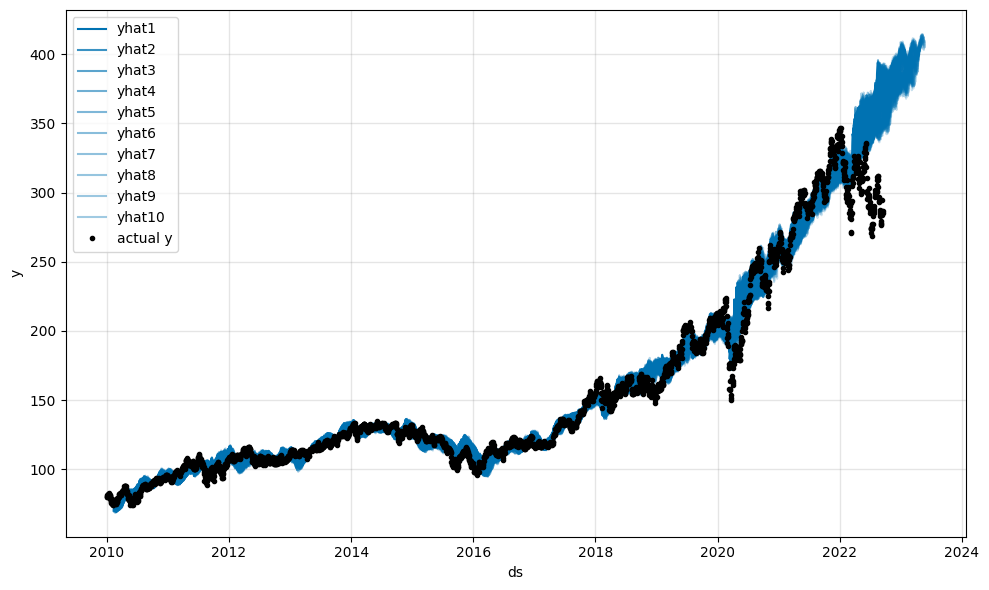

In [25]:
# plot forecast
fig_forecast = m.plot(forecast)

In [26]:
for col in forecast.columns:
    print(col)

ds
y
yhat1
residual1
yhat2
residual2
yhat3
residual3
yhat4
residual4
yhat5
residual5
yhat6
residual6
yhat7
residual7
yhat8
residual8
yhat9
residual9
yhat10
residual10
yhat11
residual11
yhat12
residual12
yhat13
residual13
yhat14
residual14
yhat15
residual15
yhat16
residual16
yhat17
residual17
yhat18
residual18
yhat19
residual19
yhat20
residual20
yhat21
residual21
yhat22
residual22
yhat23
residual23
yhat24
residual24
yhat25
residual25
yhat26
residual26
yhat27
residual27
yhat28
residual28
yhat29
residual29
yhat30
residual30
yhat31
residual31
yhat32
residual32
yhat33
residual33
yhat34
residual34
yhat35
residual35
yhat36
residual36
yhat37
residual37
yhat38
residual38
yhat39
residual39
yhat40
residual40
yhat41
residual41
yhat42
residual42
yhat43
residual43
yhat44
residual44
yhat45
residual45
yhat46
residual46
yhat47
residual47
yhat48
residual48
yhat49
residual49
yhat50
residual50
yhat51
residual51
yhat52
residual52
yhat53
residual53
yhat54
residual54
yhat55
residual55
yhat56
residual56
yhat5

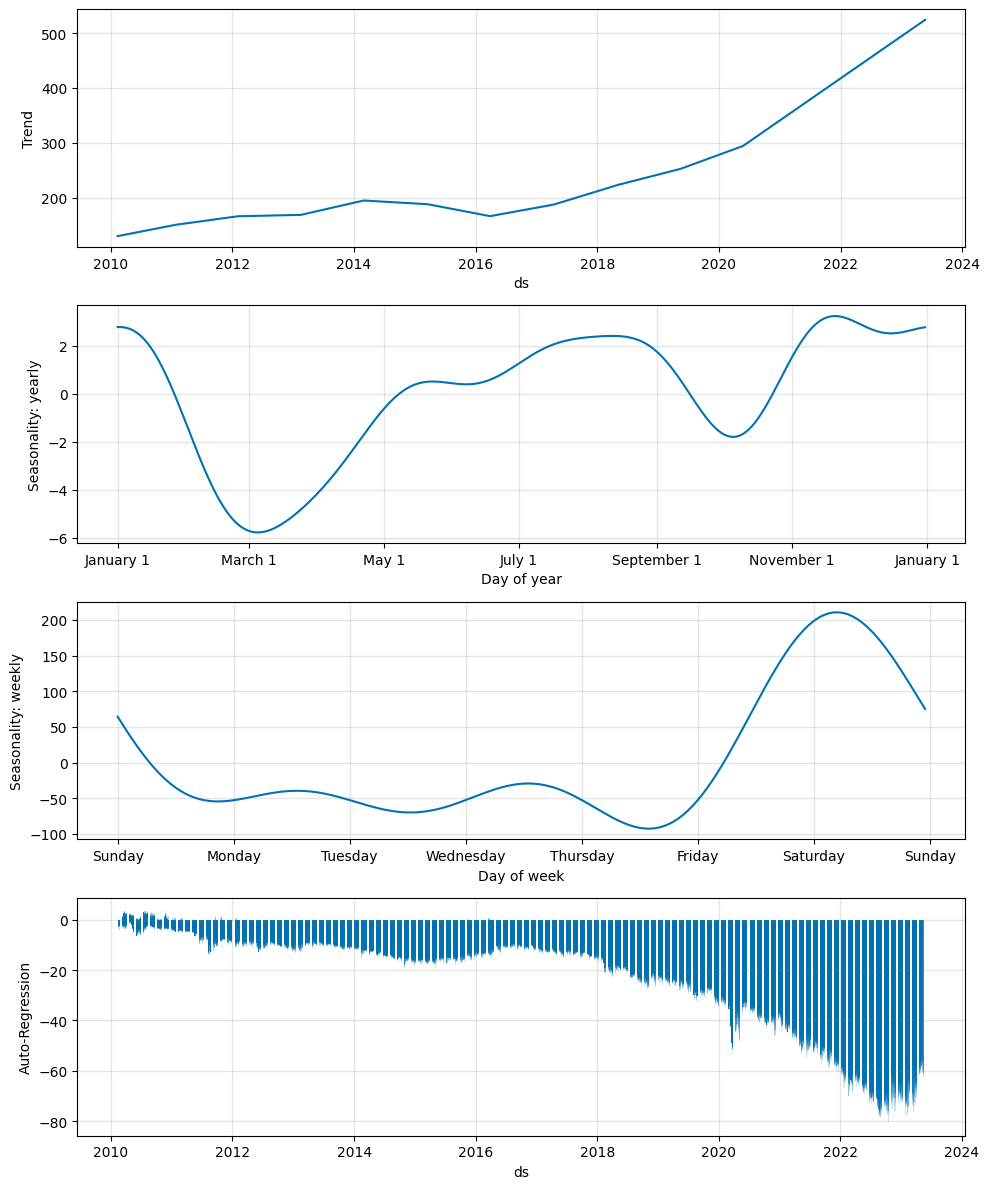

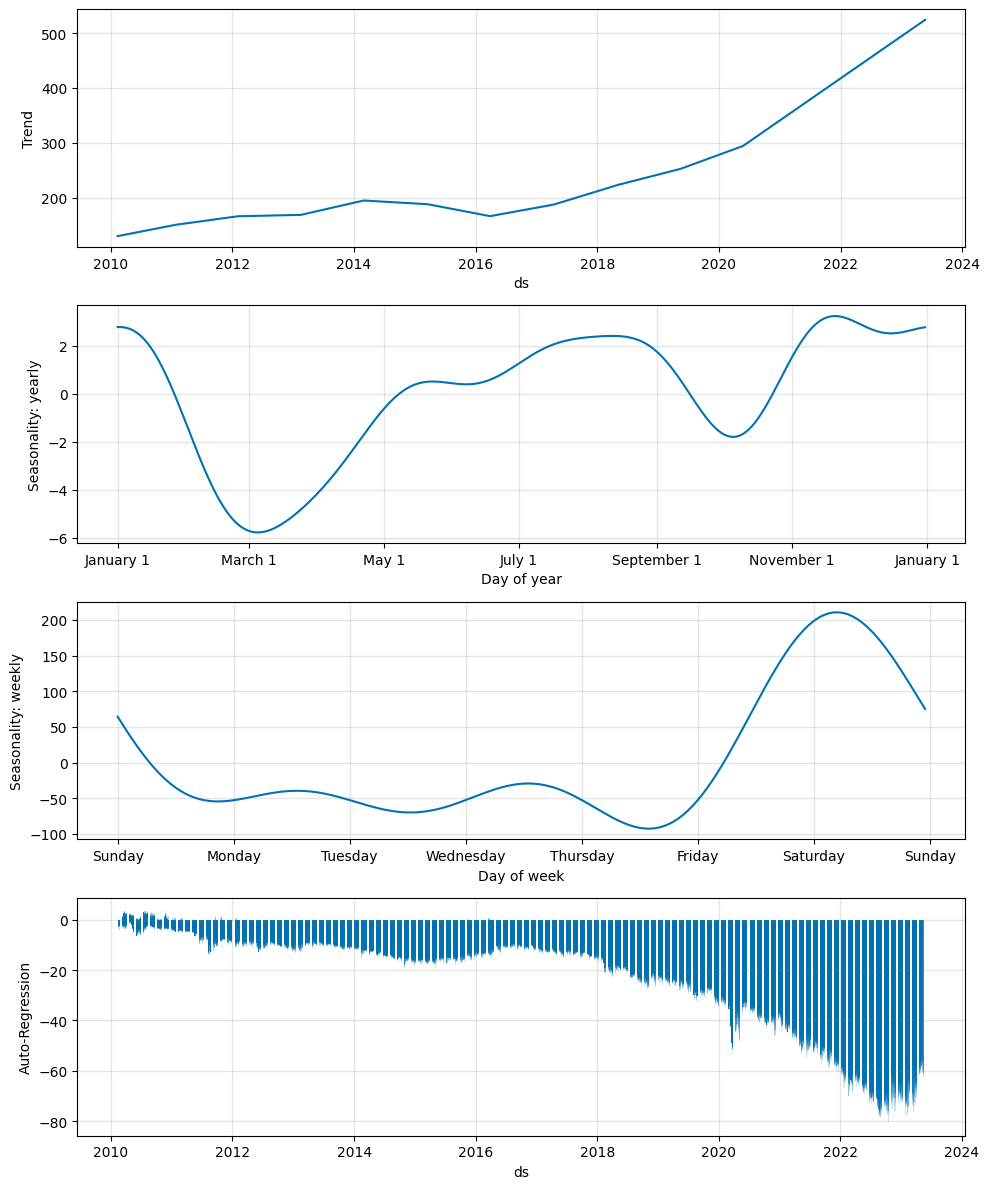

In [27]:
m.plot_components(forecast)
#plt.show()

In [28]:
# normalized daily returns
def normalized_returns(df):
    return np.log(1 + df.pct_change(periods=1).fillna(value=None, method='bfill', axis=0, inplace=False, limit=7, downcast=None)) 

# create weights
def weight_creator(df):
    rand = np.random.random(len(df.columns))
    rand /= rand.sum()
    return rand

# calculate portfolio return
def portfolio_returns(df, weights):
    return np.dot(df.mean(), weights)

# calculate portfolios standard deviation
def portfolio_std(df, weights):
    return (np.dot(np.dot(df.cov(), weights), weights))**(1/2)*np.sqrt(250)

def portfolio_sharp_ratio(portfolio_return:float, portfolio_std:float, rfr:float)->float:
    """Calculate the sharp ratio for a given portfolio df and a given risk-free-return "rfr"."""
    ntd = 250 #  number of trading days
    return np.divide(portfolio_return - rfr/ntd, portfolio_std) 

In [29]:
# plot daily portfolio worth
fig = px.line(normalized_returns(df), 
              y="Linde", 
              title='Linde: Normalized Returns')
fig.show()

In [30]:
# testing the functions
df_returns = normalized_returns(df)
weights = weight_creator(df_returns)
sdev = portfolio_std(df_returns, weights)
returns = portfolio_returns(df_returns, weights)

print('portfolio return: {:.5f}'.format(returns))
print('portfolio standard deviation: {:.2f}'.format(sdev))

portfolio return: 0.00025
portfolio standard deviation: 0.19


In [31]:

def sim2weights_df(weights:list, stock_names:list)->pd.DataFrame:
    """Make dataframe given the portfolios´s weights from the simulations.  
    """
    # initialize weights dataframe with the weights from first simulation
    df_weights = pd.DataFrame(weights[0]).T
    for weights in weights[1:]:
        df_weights = df_weights.append(pd.DataFrame(weights).T, ignore_index=True) 
    # rename columns
    df_weights.columns = stock_names
    return df_weights

def sim2kpi_df(sim_returns:list, sim_standard_deviations:list, sim_sharp_ratios:list)->pd.DataFrame:
    """Generate key performance indicator dataframe from simulation returns, simulation standard deviations and simulation sharp ratios."""
    return pd.DataFrame(data={'portfolio return': sim_returns, 
                               'portfolio standard dev': sim_standard_deviations, 
                               'portfolio sharp ratio': sim_sharp_ratios})

def sim2_df(sim_returns:list, sim_standard_deviations:list, sim_sharp_ratios:list, weights:list, stock_names:list)->pd.DataFrame:
    """Save monte-carlo simulation results in dataframe"""
    sim_weights_df = sim2weights_df(weights, stock_names)
    sim_kpi_df = sim2kpi_df(sim_returns, sim_standard_deviations, sim_sharp_ratios) 
    return sim_weights_df.join(sim_kpi_df)

In [32]:
# Monte-Carlo Simulation
w = []
returns = []
stds = []
srs = []

# caclulate normalized daily returns 
df_returns = normalized_returns(df)

for n in range(1000):
    weights = weight_creator(df_returns)
    portfolio_return = portfolio_returns(df_returns, weights)
    portfolio_stdev = portfolio_std(df_returns, weights) 
    portfolio_sr = portfolio_sharp_ratio(portfolio_return, portfolio_stdev, rfr=0.02)
    w.append(weights)
    returns.append(portfolio_return)
    stds.append(portfolio_stdev)
    srs.append(portfolio_sr)

In [33]:
# save simulation results in dataframe
stock_names = list(df.columns)
df_simulation = sim2_df(returns, stds, srs, w, stock_names)
df_simulation.head()

,Adidas,Airbus,BASF,Bayer,Beiersdorf,BMW,Brenntag,Continental,Deutsche Bank,Deutsche Post,...,RWE,SAP,Siemens,Sartorius,Symrise,Volkswagen,DAX,portfolio return,portfolio standard dev,portfolio sharp ratio
0,0.021320,0.029767,0.030734,0.024691,0.002967,0.075468,0.022280,0.027087,0.025444,0.016045,...,0.024859,0.002607,0.027553,0.058805,0.063843,0.031078,0.060385,0.000294,0.185343,0.001154
1,0.023398,0.024855,0.020041,0.046848,0.011841,0.060984,0.007271,0.024019,0.059123,0.039054,...,0.022723,0.004932,0.037764,0.055561,0.009863,0.037976,0.049498,0.000233,0.195265,0.000782
2,0.010337,0.036130,0.001508,0.023265,0.037466,0.042013,0.048861,0.000603,0.012766,0.040655,...,0.054836,0.041874,0.028289,0.058305,0.004955,0.013981,0.038066,0.000247,0.178566,0.000934
3,0.030014,0.007948,0.053949,0.061354,0.013845,0.061412,0.006027,0.072896,0.028558,0.008042,...,0.026981,0.031682,0.032716,0.011023,0.021626,0.028466,0.037201,0.000160,0.202129,0.000398
4,0.040377,0.002089,0.002090,0.014625,0.044858,0.032804,0.065687,0.037416,0.040802,0.031674,...,0.013286,0.048941,0.019428,0.061444,0.060816,0.034120,0.015130,0.000312,0.186518,0.001246


In [34]:
# plot returns vs risk
fig = px.scatter(x=df_simulation['portfolio standard dev'], 
                 y=df_simulation['portfolio return']*100,
                 color=df_simulation['portfolio sharp ratio']*100,
                 labels={'y': 'return [%]', 'x': 'standard deviation', 'color': 'sharp ratio'},
                 width=600, 
                 title='Portfolio´s Returns and Risks Monte-Carlo Simulation')
fig.show()

In [35]:
# find mimimum risk (i.e. variance) portfolio
def min_variance_portfolio(df_simulation:pd.DataFrame, stocknames:list)->pd.DataFrame:
    """Get weights of the portfolio with minimal variance or risk. Input dataframe of the simulation and a list of the stock names"""
    return df_simulation.sort_values(by='portfolio standard dev')[stocknames].iloc[0,:].values

In [36]:
weights_opt = min_variance_portfolio(df_simulation, stock_names)

In [37]:
# testing the functions
df_returns = normalized_returns(df)
sdev = portfolio_std(df_returns, weights_opt)
returns = portfolio_returns(df_returns, weights_opt)

print('portfolio return: {:.5f}'.format(returns*100))
print('portfolio standard deviation: {:.2f}'.format(sdev))

portfolio return: 0.01840
portfolio standard deviation: 0.17


In [38]:
# find optimal portfolio for given risk

# define risk bounds i.e. maximal acceptable risk
risk_bounds = (0, 0.2)
risk_indices = df_simulation['portfolio standard dev'].between(risk_bounds[0], risk_bounds[1])

# find optimal weights
weights_opt = df_simulation[risk_indices].sort_values(by='portfolio return', ascending=False)[stock_names].iloc[0,:].values
weights_opt

array([0.05627627, 0.03912835, 0.00583172, 0.03523343, 0.02575986,
       0.02877953, 0.02923338, 0.0125887 , 0.02284228, 0.06023824,
       0.04176195, 0.0091384 , 0.01291002, 0.0025581 , 0.02071902,
       0.00148838, 0.07126584, 0.02550988, 0.01560458, 0.00399686,
       0.05404352, 0.00538468, 0.00947216, 0.02362451, 0.05288405,
       0.0451895 , 0.04493273, 0.03552869, 0.07721516, 0.05186605,
       0.04026933, 0.03872483])

In [39]:
# testing the functions
df_returns = normalized_returns(df)
sdev = portfolio_std(df_returns, weights_opt)
returns = portfolio_returns(df_returns, weights_opt)

print('portfolio return: {:.5f}'.format(returns*100))
print('portfolio standard deviation: {:.2f}'.format(sdev))

portfolio return: 0.03355
portfolio standard deviation: 0.19
